In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces

In [0]:
seed = 0
data = fetch_olivetti_faces(random_state=seed, shuffle=True)

In [3]:
print(len(data.target), data.data[0].shape)

400 (4096,)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

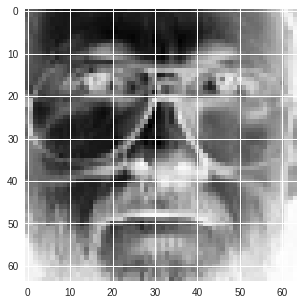

In [5]:
plt.figure(figsize=(5, 5))
plt.imshow(data.data[0].reshape(64, 64));

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import keras

Using TensorFlow backend.


In [0]:
from keras.backend import clear_session

def create_model():
  clear_session()
  
  model = keras.Sequential()
  model.add(
      keras.layers.Conv2D(4, (4, 4), padding='valid', input_shape=(64, 64, 1))
  )
  model.add(keras.layers.MaxPool2D((3, 3), padding='valid'))
  model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.Dropout(0.2))
  model.add(
      keras.layers.Conv2D(8, (3, 3), padding='valid')
  )
  model.add(keras.layers.MaxPool2D((2, 2), padding='valid'))
  model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(len(pd.unique(data.target)), activation='softmax'))
  
  model.compile(
      loss='categorical_crossentropy',
      metrics=['categorical_accuracy'],
      optimizer='adam'
  )
  
  return model

In [0]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

train_X, test_X, train_y, test_y = train_test_split(
    data.data.reshape(-1, 64, 64, 1),
    to_categorical(data.target),
    stratify=to_categorical(data.target),
    random_state=seed, shuffle=True, test_size=0.25
)

In [9]:
model = create_model()
model.fit(
    train_X, train_y,
    epochs=200,
    batch_size=10,
    verbose=1,
    validation_data=(
        test_X, test_y
    )
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 300 samples, validate on 100 samples
Epoch 1/200
300/300 [==============================] - 1s 3ms/step - loss: 3.7298 - categorical_accuracy: 0.0200 - val_loss: 3.6885 - val_categorical_accuracy: 0.0400
Epoch 2/200
300/300 [==============================] - 1s 2ms/step - loss: 3.6931 - categorical_accuracy: 0.0333 - val_loss: 3.6871 - val_categorical_accuracy: 0.0200
Epoch 3/200
300/300 [==============================] - 1s 3ms/step - loss: 3.6809 - categorical_accuracy: 0.0467 - val_loss: 3.6787 - val_categorical_accuracy: 0.0400
Epoch 4/200
300/300 [==============================] - 1s 3ms/step - loss: 3.6750 - categorical_accuracy: 0.0500 - val_loss: 3.6671 - val_categorical_accuracy: 0.0400
Epoch 5/200
300/300 [==============================

In [10]:
print(classification_report(np.argmax(test_y, axis=1), np.argmax(model.predict(test_X), axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       0.67      1.00      0.80         2
           3       0.67      1.00      0.80         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         2
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       1.00    

In [11]:
confusion = pd.DataFrame(
    confusion_matrix(np.argmax(test_y, axis=1), np.argmax(model.predict(test_X), axis=1)),
    columns=range(len(pd.unique(data.target)))
)
errors = []
for column in range(len(pd.unique(data.target))):
  for row in range(len(pd.unique(data.target))):
    if row == column:
      continue
    if confusion.loc[row, column] > 0:
      errors.append((row, column))
      print("Missed %d/%d: %d" % (row, column, confusion.loc[row, column]))

Missed 25/2: 1
Missed 25/3: 1
Missed 34/4: 1
Missed 7/15: 1


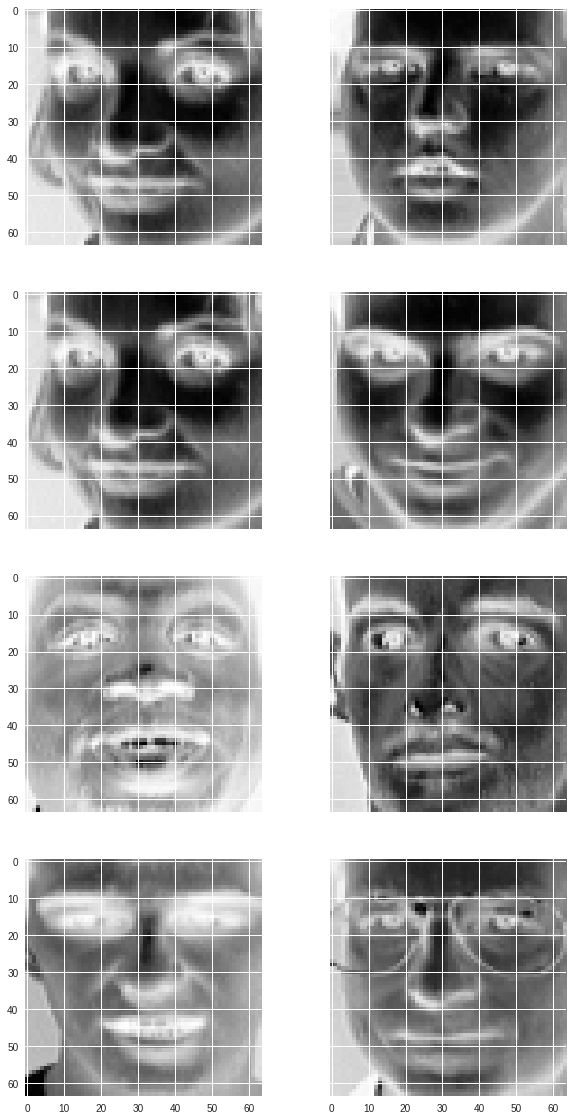

In [12]:
fig, ax = plt.subplots(len(errors), 2, sharex=True, sharey=True, figsize=(10, 5 * len(errors)))
index = 0
for first, second in errors:
  ax[index][0].imshow(test_X[first].reshape(64, 64))
  ax[index][1].imshow(test_X[second].reshape(64, 64))
  index += 1
plt.show()